In [1]:
import numpy as np
import matplotlib.pyplot as plt

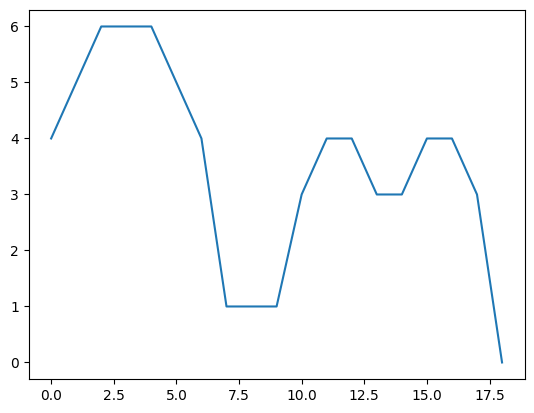

In [4]:
x = np.arange(0,19,1, dtype=np.float64)
x = x[x != 3.] # data is missing x = 3 value
y = np.array([4., 5., 6., 6., 5., 4., 1., 1., 1., 3., 4., 4., 3., 3., 4., 4., 3., 0.])
plt.plot(x,y)
plt.show()

# Natural Spline

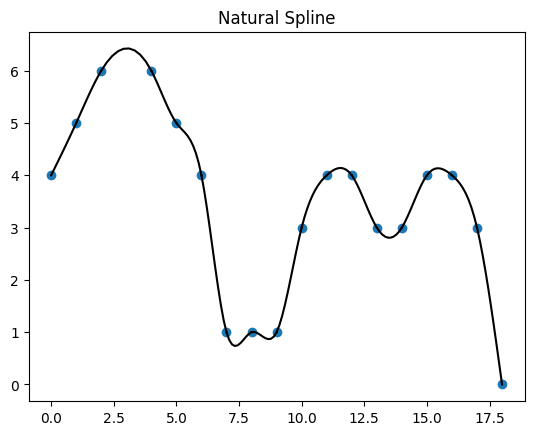

In [26]:
n = len(x) # number of datapoints

# Following vectors are size n-1 since we have n-1 spline equations

a = np.zeros(n-1, dtype=np.float64) # the 'a' coefficient for the spline equations
b = np.zeros(n-1, dtype=np.float64) # the 'b' coefficient for the spline equations
d = np.zeros(n-1) # the 'd' coefficient for the spline equations

# Following vectors are size n-1 since we have n-1 spline equations

delta = np.zeros(n-1, dtype=np.float64) # convienient notation for spline equations
Delta = np.zeros(n-1, dtype=np.float64) # convienient notation for spline equations

# Following vectors are size n or nxn as we seek to solve Ac=b_ where 
# c is size n

A = np.zeros((n,n), dtype=np.float64) # "A" matrix (Ac=b_) to be solved to find c vector
b_ = np.zeros(n, dtype=np.float64) # "b_" matrix (Ac=b_) to be solved to find c vector

# Populate important vectors defined above
for i in range(n-1):
    a[i] = y[i]
    delta[i] = x[i+1] - x[i]
    Delta[i] = y[i+1] - y[i]

# Establish the "A" and "b_" matricies which are used to find c
for i in range(n-2):
    A[i+1, i:i+3] = np.array([delta[i], 2*(delta[i] + delta[i+1]), delta[i+1]])
    b_[i+1] = 3*(Delta[i+1]/delta[i+1] - Delta[i]/delta[i])

# Natural spline conditions
A[0,0] = 1
A[-1,-1] = 1

# Determine c
c = np.linalg.solve(A,b_)

# Determine remaining b and d coefficients for spline equation
for i in range(n-1):
    d[i] = (c[i+1] - c[i])/(3*delta[i])
    b[i] = Delta[i]/delta[i] - delta[i]/3*(2*c[i] + c[i+1])

# Plot the solutions on each relevant interval
for j in range(n-1):
    x_vals = np.linspace(x[j],x[j+1],10)
    y_vals = a[j] + b[j]*(x_vals - x[j]) + c[j]*(x_vals - x[j])**2 + d[j]*(x_vals - x[j])**3
    plt.plot(x_vals, y_vals, c='k')

plt.scatter(x,y)
plt.title("Natural Spline")
plt.show()

# Curvature-Adjusted Spline

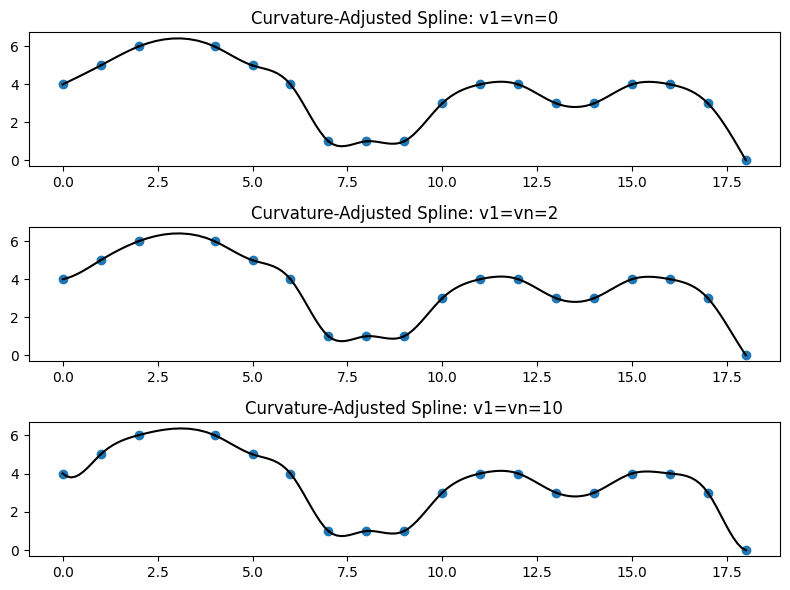

In [40]:
n = len(x) # number of datapoints

# Following vectors are size n-1 since we have n-1 spline equations

a = np.zeros(n-1, dtype=np.float64) # the 'a' coefficient for the spline equations
b = np.zeros(n-1, dtype=np.float64) # the 'b' coefficient for the spline equations
d = np.zeros(n-1) # the 'd' coefficient for the spline equations

# Following vectors are size n-1 since we have n-1 spline equations

delta = np.zeros(n-1, dtype=np.float64) # convienient notation for spline equations
Delta = np.zeros(n-1, dtype=np.float64) # convienient notation for spline equations

# Following vectors are size n or nxn as we seek to solve Ac=b_ where 
# c is size n

A = np.zeros((n,n), dtype=np.float64) # "A" matrix (Ac=b_) to be solved to find c vector
b_ = np.zeros(n, dtype=np.float64) # "b_" matrix (Ac=b_) to be solved to find c vector

# Input curvature-adjusted spline conditions
v1_ = [0, 2, 10]
vn_ = [0, 2, 10]

fig, ax = plt.subplots(3,1, figsize=(8,6))

# For each value in v1_, vn_
for q in range(len(v1_)):

    # Populate important vectors defined above
    for i in range(n-1):
        a[i] = y[i]
        delta[i] = x[i+1] - x[i]
        Delta[i] = y[i+1] - y[i]

    # Establish the "A" and "b_" matricies which are used to find c
    for i in range(n-2):
        A[i+1, i:i+3] = np.array([delta[i], 2*(delta[i] + delta[i+1]), delta[i+1]])
        b_[i+1] = 3*(Delta[i+1]/delta[i+1] - Delta[i]/delta[i])

    # Curvature-adjusted spline conditions:
    A[0,0] = 1
    A[-1,-1] = 1
    v1 = v1_[q]
    vn = vn_[q]
    b_[0] = v1/2
    b_[-1] = vn/2

    # Determine c
    c = np.linalg.solve(A,b_)

    # Determine remaining b and d coefficients for spline equation
    for i in range(n-1):
        d[i] = (c[i+1] - c[i])/(3*delta[i])
        b[i] = Delta[i]/delta[i] - delta[i]/3*(2*c[i] + c[i+1])

    # Plot the solutions on each relevant interval
    for j in range(n-1):
        x_vals = np.linspace(x[j],x[j+1],10)
        y_vals = a[j] + b[j]*(x_vals - x[j]) + c[j]*(x_vals - x[j])**2 + d[j]*(x_vals - x[j])**3
        ax[q].plot(x_vals, y_vals, c='k')
    ax[q].scatter(x,y)
    ax[q].set_title(f"Curvature-Adjusted Spline: v1=vn={v1}")

fig.tight_layout()
plt.show()